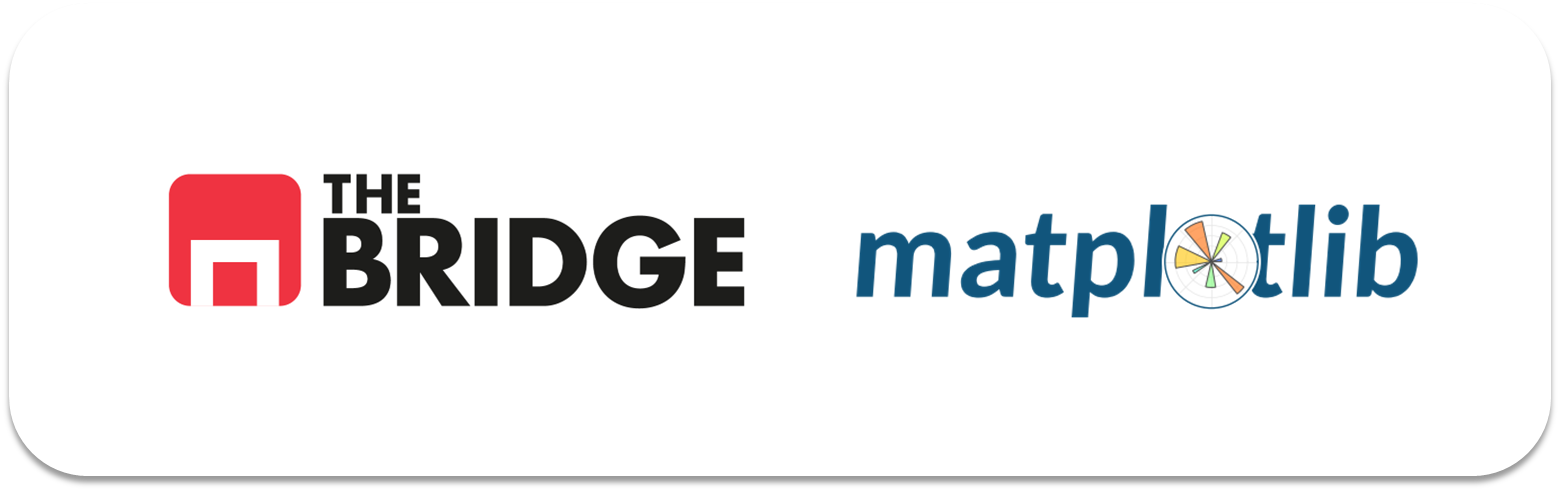

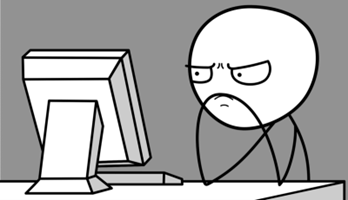

Para ejercitarte y afianzar lo aprendido sobre gráficas de Matplotlib, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Importaciones previas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use("tableau-colorblind10")

### Ejercicio 1


Carga tu qerido dataset del titanic, en la ruta "./data/titanic.csv", no hace falta que hagas limpieza.

In [2]:
df = pd.read_csv("./data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Ejercicio 2



Crea el histograma de la variable `age` de forma que se reproduzca la siguiente figura (tiene 30 bines)

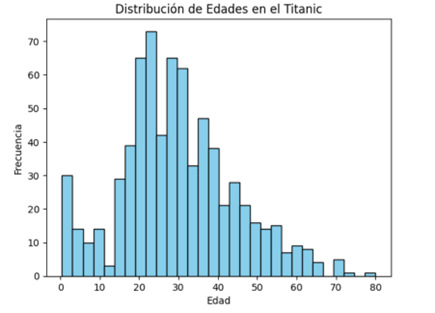

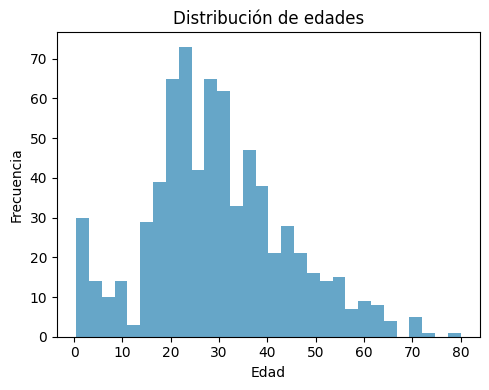

In [8]:
ages = df["age"].dropna()
fig, ax = plt.subplots(figsize=(5,4))
ax.hist(ages, bins=30, alpha=0.6)
ax.set_title("Distribución de edades")
ax.set_xlabel("Edad")
ax.set_ylabel("Frecuencia")
plt.tight_layout()
plt.show()


### Ejercicio 3

¿Cuáles son los 3 intervalos de valores con mayor número de viajeros según el gráfico anterior? ¿Obtén también el número de viajeros en cada uno?

### Ejercicio 4

Obten el diagrama de caja del precio del billete usando las funciones de matplotlib y reproduciendo la siguiente figura (tendrás que bucear un poco en los parámetros, y usar patch_artist = True, el tamaño de los bigotes está ajustado a 3 IQRs):

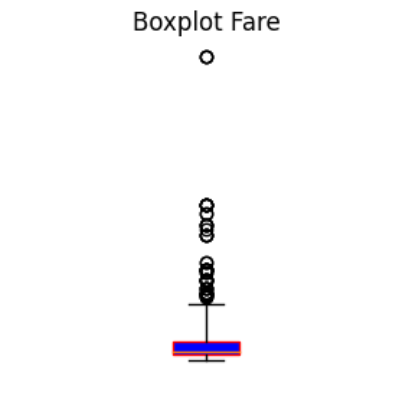

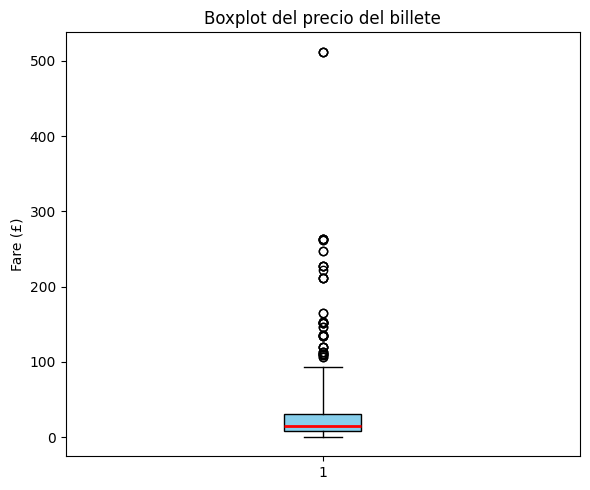

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))

# Boxplot con patch_artist=True y whis=3 (bigotes = 3 IQRs)
bp = ax.boxplot(
    df.fare,
    patch_artist=True,
    whis=3,       # 3 IQRs
    boxprops=dict(facecolor="skyblue", color="black"),
    medianprops=dict(color="red", linewidth=2),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black")
)

ax.set_title("Boxplot del precio del billete")
ax.set_ylabel("Fare (£)")

plt.tight_layout()
plt.show()

### Ejercicio 5

Crea el gráfico de frecuencias absolutas y relativas de las ciudades de embarque del Titanic de forma que repodruzcan la siguiente figura:

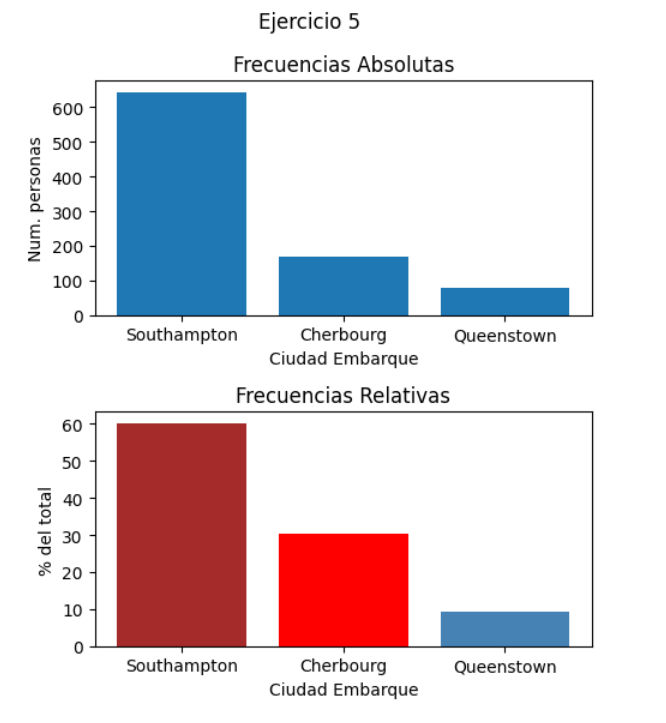

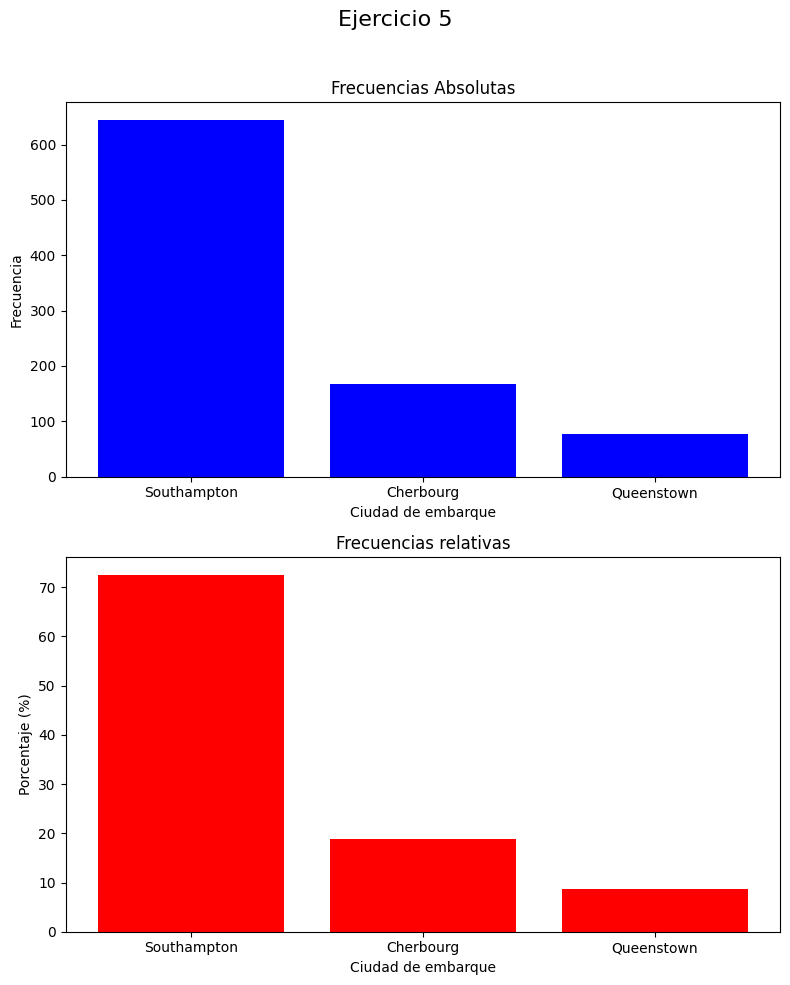

In [14]:
# Frecuencias absolutas y relativas
abs_freq = df["embark_town"].value_counts()
rel_freq = df["embark_town"].value_counts(normalize=True) * 100

# Crear figura con 2 filas y 1 columna
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

fig.suptitle("Ejercicio 5", fontsize=16)

# ----- Gráfico 1: Frecuencias absolutas -----
ax[0].bar(abs_freq.index, abs_freq.values, color="blue")
ax[0].set_title("Frecuencias Absolutas")
ax[0].set_xlabel("Ciudad de embarque")
ax[0].set_ylabel("Frecuencia")

# ----- Gráfico 2: Frecuencias relativas -----
ax[1].bar(rel_freq.index, rel_freq.values, color="red")
ax[1].set_title("Frecuencias relativas")
ax[1].set_xlabel("Ciudad de embarque")
ax[1].set_ylabel("Porcentaje (%)")

plt.tight_layout(rect=[0, 0, 1, 0.96])  # espacio para el título general
plt.show()

### Ejercicio 6

Crea el gráfico de dispersión entre el precio y la edad, de forma que reproduzca el siguiente gráfico (tendrás que emplear el argumento alpa)

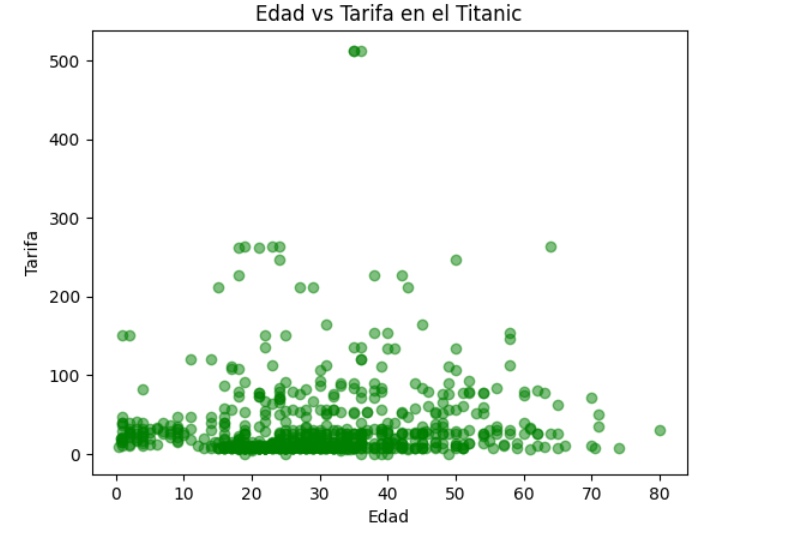

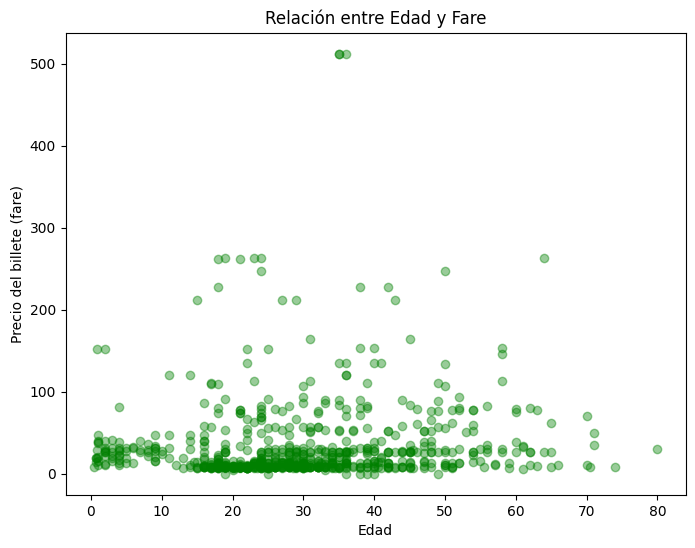

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df["age"], df["fare"], alpha=0.4, color="green")

plt.xlabel("Edad")
plt.ylabel("Precio del billete (fare)")
plt.title("Relación entre Edad y Fare")

plt.show()

### Ejercicio 7

Vamos a obtener el precio medio por edad, de la siguiente forma agrupa por edad y calcula la media de la tarifa, luego haz lo mismo pero calculando la desviación de estándar. Guarda los resultados en dos variables distintas.

In [23]:
# Seleccionamos solo las columnas necesarias y eliminamos nulos
df_age_fare = df[["age", "fare"]].dropna()
df_age_fare["age_round"] = df_age_fare["age"].round().astype(int)

# Agrupamos por edad (tal cual aparece en el dataset)
mean_by_age = df_age_fare.groupby("age_round")["fare"].mean()
std_by_age = df_age_fare.groupby("age_round")["fare"].std()

mean_by_age.head(), std_by_age.head()

(age_round
 0     8.516700
 1    35.566023
 2    37.536250
 3    25.781950
 4    29.543330
 Name: fare, dtype: float64,
 age_round
 0          NaN
 1    36.660417
 2    40.979945
 3     9.489778
 4    20.263399
 Name: fare, dtype: float64)

### Ejercicio 8

Considerando las medias como un conjunto de medidas y las desviaciones como el error de las mismas construye un diagrama de errores que reproduzca la siguiente figura, usando (£) como moneda:

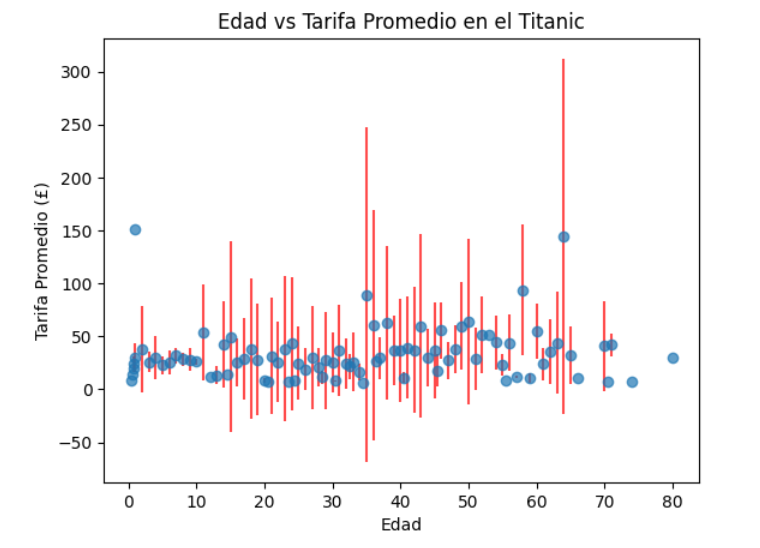

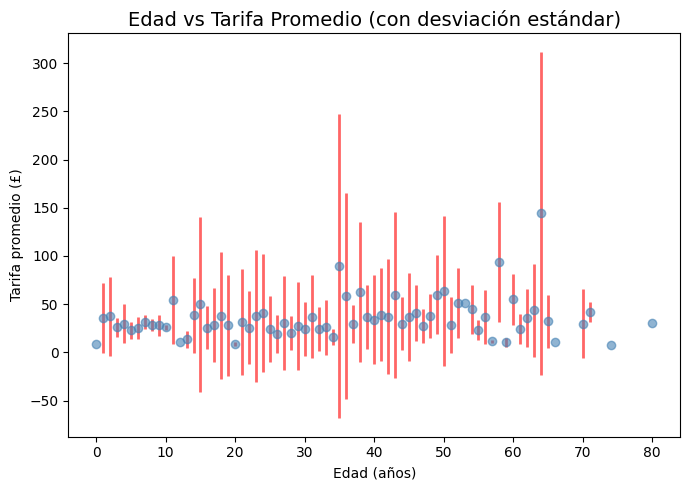

In [28]:
# Convertimos los índices (edad) y valores (media y desviación)
ages = mean_by_age.index.values
means = mean_by_age.values
errors = std_by_age.values

fig, ax = plt.subplots(figsize=(7, 5))

# Diagrama de errores
ax.errorbar(
    ages, means,
    yerr=errors,
    fmt='o',                    # marca
    color="steelblue",               # punto azul
    alpha=0.6,                  # transparencia del punto
    ecolor="red",               # color de la línea de error
    elinewidth=2
)

# Etiquetas y título
ax.set_title("Edad vs Tarifa Promedio (con desviación estándar)", fontsize=14)
ax.set_xlabel("Edad (años)")
ax.set_ylabel("Tarifa promedio (£)")

plt.tight_layout()
plt.show()



EXTRA: Pinta los cuatro primeros gráficos conjuntamente en una sóla figura como la que ves a continuación:

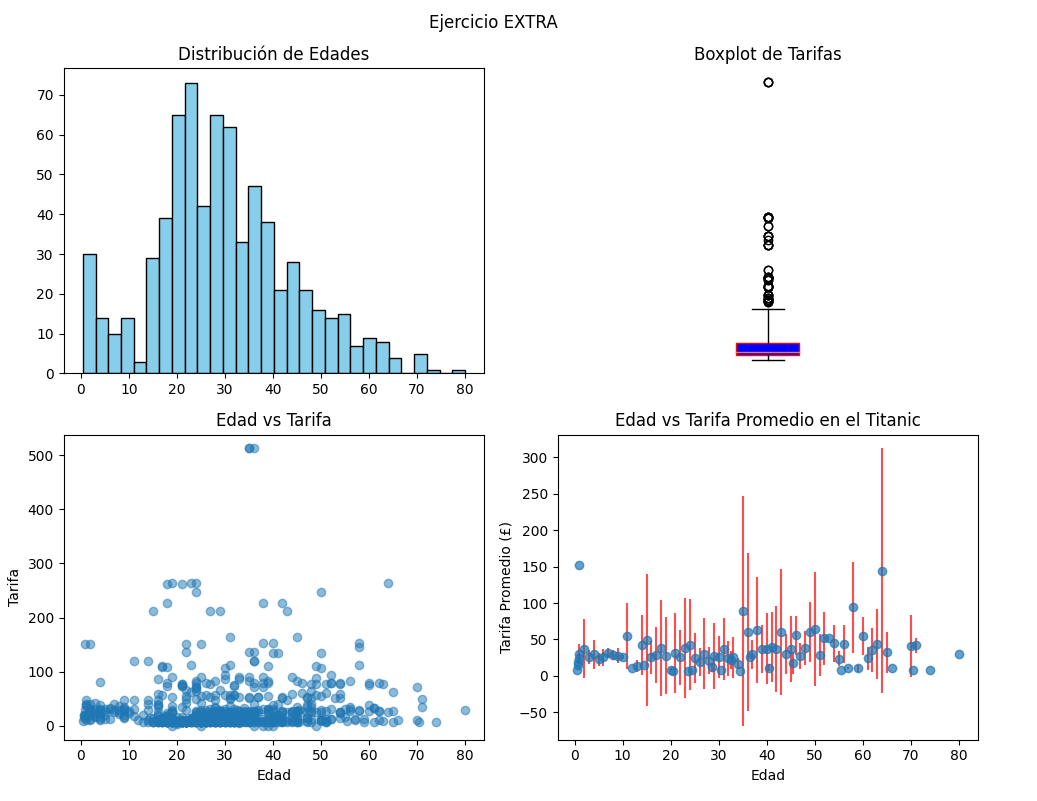

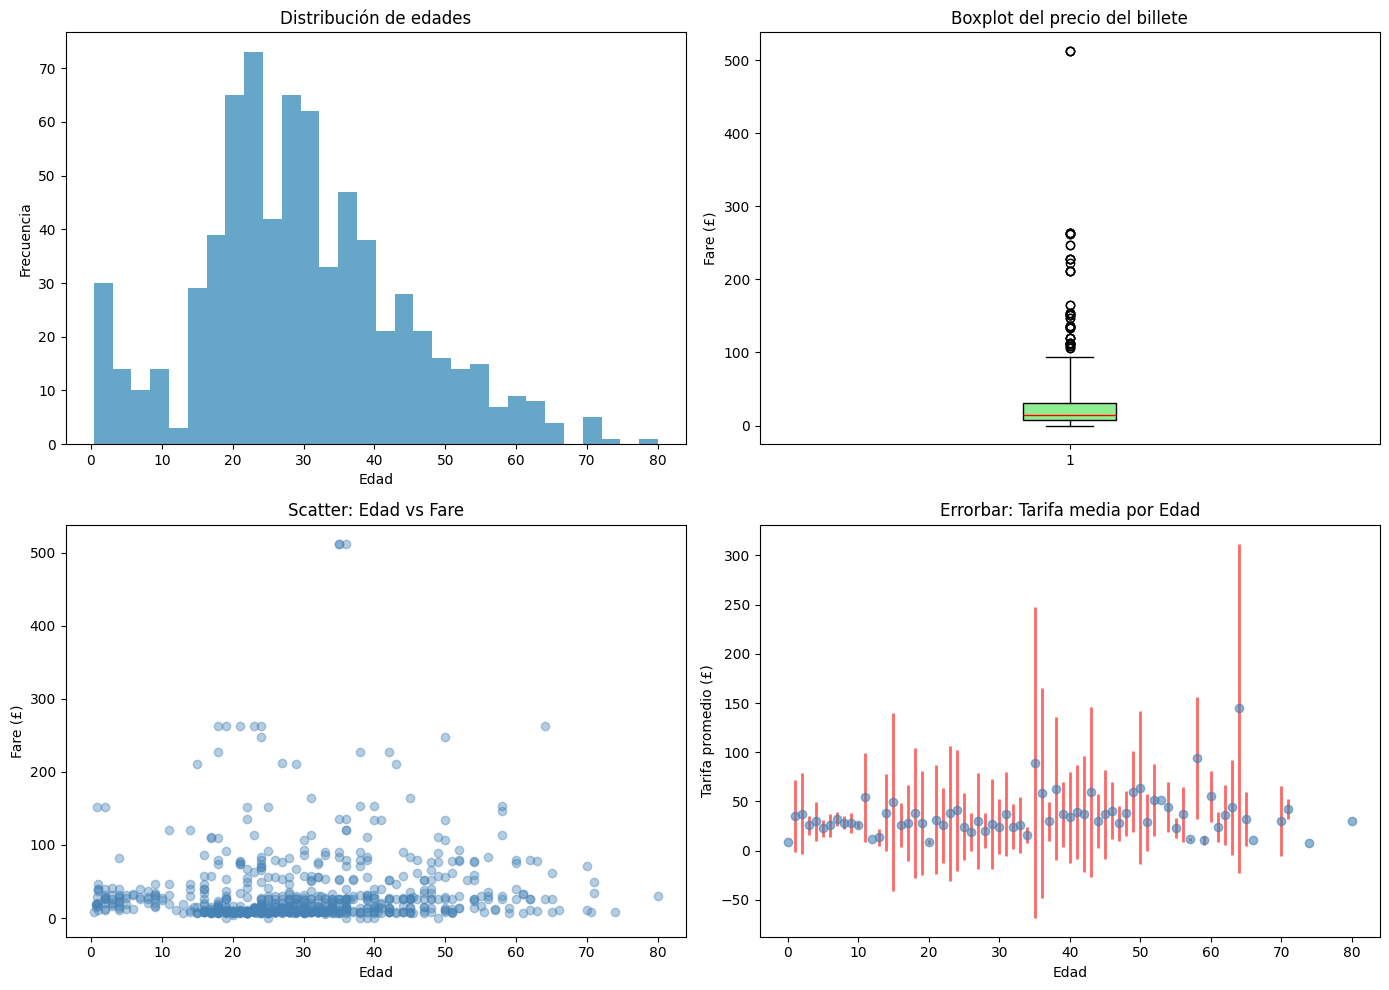

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# ==========================
# 1. HISTOGRAMA (AGE)
# ==========================
ages = df["age"].dropna()
ax = axs[0, 0]
ax.hist(ages, bins=30, alpha=0.6)
ax.set_title("Distribución de edades")
ax.set_xlabel("Edad")
ax.set_ylabel("Frecuencia")

# ==========================
# 2. BOXPLOT (FARE)
# ==========================
ax = axs[0, 1]
ax.boxplot(
    df.fare,
    patch_artist=True,
    whis=3,
    boxprops=dict(facecolor="lightgreen", color="black"),
    medianprops=dict(color="red")
)
ax.set_title("Boxplot del precio del billete")
ax.set_ylabel("Fare (£)")

# ==========================
# 3. SCATTER (AGE vs FARE)
# ==========================
ax = axs[1, 0]
ax.scatter(df["age"], df["fare"], alpha=0.4, color="steelblue")
ax.set_title("Scatter: Edad vs Fare")
ax.set_xlabel("Edad")
ax.set_ylabel("Fare (£)")


# ==========================
# 4. ERRORBAR (MEAN ± STD)
# ==========================
ax = axs[1, 1]
ages = mean_by_age.index.values
means = mean_by_age.values
errors = std_by_age.values

ax.errorbar(
    ages, means,
    yerr=errors,
    fmt='o',                    # marca
    color="steelblue",               # punto azul
    alpha=0.6,                  # transparencia del punto
    ecolor="red",               # color de la línea de error
    elinewidth=2
)
ax.set_title("Errorbar: Tarifa media por Edad")
ax.set_xlabel("Edad")
ax.set_ylabel("Tarifa promedio (£)")

# Ajustes finales
plt.tight_layout()
plt.show()

